This sheet perform the model output analysis
1. Compute scatter graph for the actual price with the age_price 
a. box plot to show the variance for both
2. Overall score, statistical test 
3. District analysis among the score
a. evaluate why certain district have such low or high score 
b. reveal characteristics of the districts 

In [2]:
import pandas as pd

model_output_df = pd.read_csv('age_df_v3.csv')
model_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   district                             6156 non-null   object 
 1   bedroom_count                        6156 non-null   int64  
 2   property_age                         6156 non-null   int64  
 3   saleable_area                        6156 non-null   int64  
 4   travel_time_to_cbd                   6156 non-null   int64  
 5   walking_time_to_mtr                  6156 non-null   int64  
 6   total_poi_within_1000m               6156 non-null   int64  
 7   category_Education_within_2000m      6156 non-null   int64  
 8   category_Medical_within_2000m        6156 non-null   int64  
 9   category_Public_Market_within_1000m  6156 non-null   int64  
 10  pet_policy_binary                    6156 non-null   int64  
 11  dataset                       

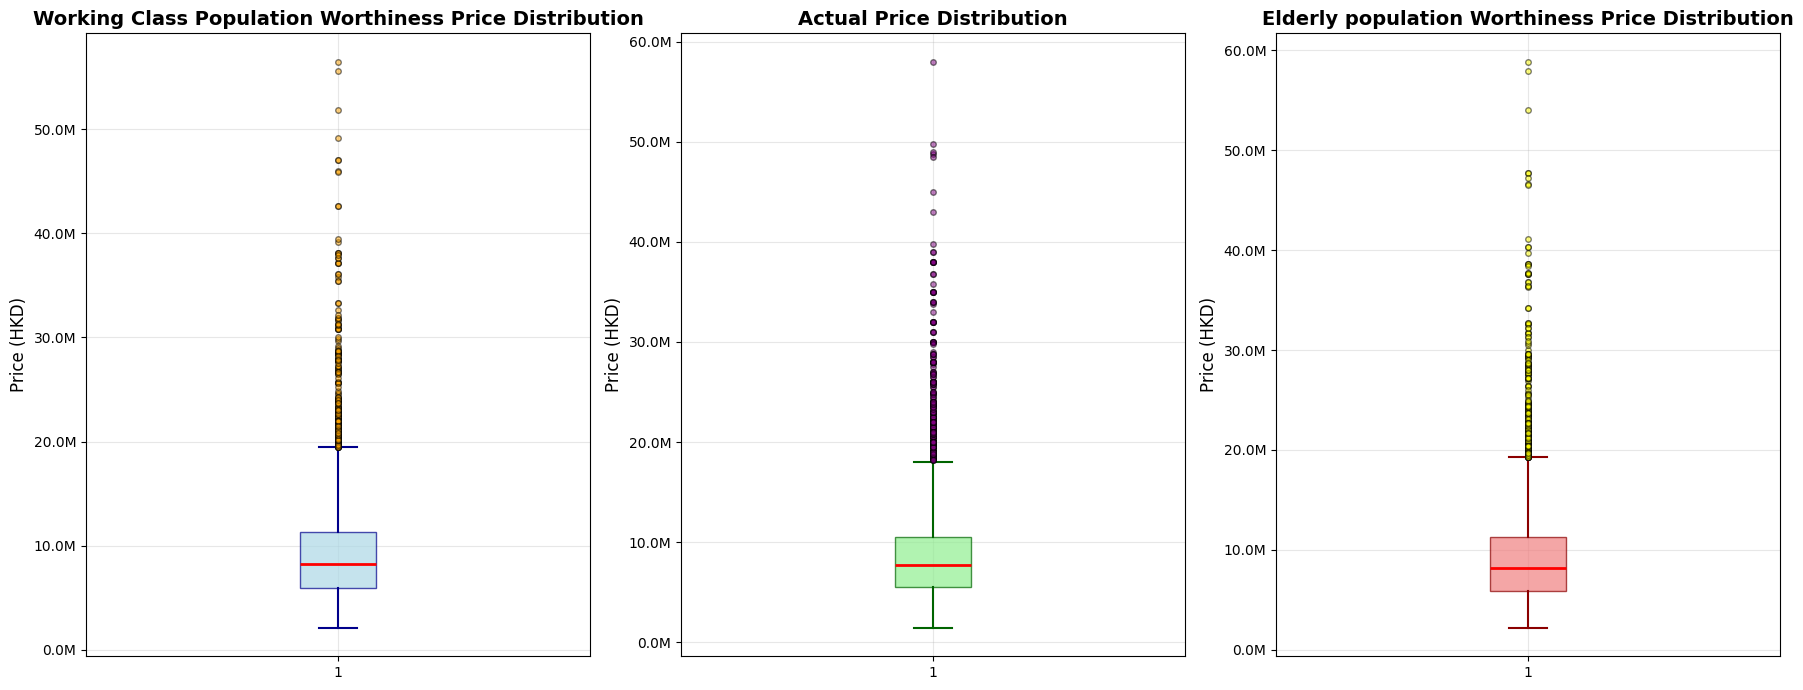

=== COMPREHENSIVE STATISTICAL SUMMARY ===

📊 Age 2 Worthiness Price:
   Mean: HKD 9.52M
   Median: HKD 8.21M
   Std Dev: HKD 5.26M
   Variance: HKD 27.63M²
   Min: HKD 2.08M
   Max: HKD 56.50M
   Q1: HKD 5.94M
   Q3: HKD 11.35M
   IQR: HKD 5.40M
   Number of outliers (>2σ): 289


🏠 Actual Price:
   Mean: HKD 8.87M
   Median: HKD 7.68M
   Std Dev: HKD 5.05M
   Variance: HKD 25.48M²
   Min: HKD 1.43M
   Max: HKD 58.00M
   Q1: HKD 5.50M
   Q3: HKD 10.50M
   IQR: HKD 5.00M
   Number of outliers (>2σ): 290
📈 Age 4 Worthiness Price:
   Mean: HKD 9.47M
   Median: HKD 8.16M
   Std Dev: HKD 5.27M
   Variance: HKD 27.77M²
   Min: HKD 2.19M
   Max: HKD 58.86M
   Q1: HKD 5.93M
   Q3: HKD 11.26M
   IQR: HKD 5.33M
   Number of outliers (>2σ): 273


🔍 COMPARATIVE ANALYSIS:
   Age 2 vs Actual - Mean Difference: HKD 0.65M
   Age 4 vs Actual - Mean Difference: HKD 0.60M
   Age 4 vs Age 2 - Mean Difference: HKD -0.05M
   
   Correlation (Age 2 vs Actual): 0.9612
   Correlation (Age 4 vs Actual): 0.9567
 

In [5]:
import matplotlib.pyplot as plt    
# Add box plot for age_4_worthiness_price and update the visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

# Box plot for age_2_worthiness_price
box1 = ax1.boxplot(model_output_df['age_2_worthiness_price'], 
                   patch_artist=True, 
                   boxprops=dict(facecolor='lightblue', color='darkblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.5),
                   whiskerprops=dict(color='darkblue', linewidth=1.5),
                   capprops=dict(color='darkblue', linewidth=1.5))
ax1.set_title('Working Class Population Worthiness Price Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (HKD)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax1.grid(True, alpha=0.3)

# Box plot for actual price
box2 = ax2.boxplot(model_output_df['actual_price'], 
                   patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', color='darkgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   flierprops=dict(marker='o', markerfacecolor='purple', markersize=4, alpha=0.5),
                   whiskerprops=dict(color='darkgreen', linewidth=1.5),
                   capprops=dict(color='darkgreen', linewidth=1.5))
ax2.set_title('Actual Price Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price (HKD)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax2.grid(True, alpha=0.3)

# Box plot for age_4_worthiness_price
box3 = ax3.boxplot(model_output_df['age_4_worthiness_price'], 
                   patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', color='darkred', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   flierprops=dict(marker='o', markerfacecolor='yellow', markersize=4, alpha=0.5),
                   whiskerprops=dict(color='darkred', linewidth=1.5),
                   capprops=dict(color='darkred', linewidth=1.5))
ax3.set_title('Elderly population Worthiness Price Distribution', fontsize=14, fontweight='bold')
ax3.set_ylabel('Price (HKD)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summarization for all three distributions
print("=== COMPREHENSIVE STATISTICAL SUMMARY ===\n")

# Age 2 Worthiness Price Statistics
age2_data = model_output_df['age_2_worthiness_price']
age2_outliers = age2_data[((age2_data - age2_data.mean()) / age2_data.std()).abs() > 2]

print("📊 Age 2 Worthiness Price:")
print(f"   Mean: HKD {age2_data.mean()/1e6:.2f}M")
print(f"   Median: HKD {age2_data.median()/1e6:.2f}M")
print(f"   Std Dev: HKD {age2_data.std()/1e6:.2f}M")
print(f"   Variance: HKD {age2_data.var()/1e12:.2f}M²")
print(f"   Min: HKD {age2_data.min()/1e6:.2f}M")
print(f"   Max: HKD {age2_data.max()/1e6:.2f}M")
print(f"   Q1: HKD {age2_data.quantile(0.25)/1e6:.2f}M")
print(f"   Q3: HKD {age2_data.quantile(0.75)/1e6:.2f}M")
print(f"   IQR: HKD {(age2_data.quantile(0.75) - age2_data.quantile(0.25))/1e6:.2f}M")
print(f"   Number of outliers (>2σ): {len(age2_outliers)}")

print("\n" + "="*70 + "\n")

# Actual Price Statistics
actual_data = model_output_df['actual_price']
actual_outliers = actual_data[((actual_data - actual_data.mean()) / actual_data.std()).abs() > 2]

print("🏠 Actual Price:")
print(f"   Mean: HKD {actual_data.mean()/1e6:.2f}M")
print(f"   Median: HKD {actual_data.median()/1e6:.2f}M")
print(f"   Std Dev: HKD {actual_data.std()/1e6:.2f}M")
print(f"   Variance: HKD {actual_data.var()/1e12:.2f}M²")
print(f"   Min: HKD {actual_data.min()/1e6:.2f}M")
print(f"   Max: HKD {actual_data.max()/1e6:.2f}M")
print(f"   Q1: HKD {actual_data.quantile(0.25)/1e6:.2f}M")
print(f"   Q3: HKD {actual_data.quantile(0.75)/1e6:.2f}M")
print(f"   IQR: HKD {(actual_data.quantile(0.75) - actual_data.quantile(0.25))/1e6:.2f}M")
print(f"   Number of outliers (>2σ): {len(actual_outliers)}")

# print("\n" + "="*70 + "\n")

# Age 4 Worthiness Price Statistics
age4_data = model_output_df['age_4_worthiness_price']
age4_outliers = age4_data[((age4_data - age4_data.mean()) / age4_data.std()).abs() > 2]

print("📈 Age 4 Worthiness Price:")
print(f"   Mean: HKD {age4_data.mean()/1e6:.2f}M")
print(f"   Median: HKD {age4_data.median()/1e6:.2f}M")
print(f"   Std Dev: HKD {age4_data.std()/1e6:.2f}M")
print(f"   Variance: HKD {age4_data.var()/1e12:.2f}M²")
print(f"   Min: HKD {age4_data.min()/1e6:.2f}M")
print(f"   Max: HKD {age4_data.max()/1e6:.2f}M")
print(f"   Q1: HKD {age4_data.quantile(0.25)/1e6:.2f}M")
print(f"   Q3: HKD {age4_data.quantile(0.75)/1e6:.2f}M")
print(f"   IQR: HKD {(age4_data.quantile(0.75) - age4_data.quantile(0.25))/1e6:.2f}M")
print(f"   Number of outliers (>2σ): {len(age4_outliers)}")

# Comparison analysis
print("\n" + "="*70 + "\n")
print("🔍 COMPARATIVE ANALYSIS:")
print(f"   Age 2 vs Actual - Mean Difference: HKD {(age2_data.mean() - actual_data.mean())/1e6:.2f}M")
print(f"   Age 4 vs Actual - Mean Difference: HKD {(age4_data.mean() - actual_data.mean())/1e6:.2f}M")
print(f"   Age 4 vs Age 2 - Mean Difference: HKD {(age4_data.mean() - age2_data.mean())/1e6:.2f}M")
print(f"   \n   Correlation (Age 2 vs Actual): {age2_data.corr(actual_data):.4f}")
print(f"   Correlation (Age 4 vs Actual): {age4_data.corr(actual_data):.4f}")
print(f"   Correlation (Age 2 vs Age 4): {age2_data.corr(age4_data):.4f}")

In [6]:
import json 
# Load the dictionary from the text file
with open('dictionary.txt', 'r', encoding='utf-8') as file:
    hong_kong_districts = json.load(file)['districts']

# Preprocess district column - split by | and \ and take first value
model_output_df['district'] = model_output_df['district'].str.split('|').str[0].str.split('\\').str[0].str.strip()

# Create a case-insensitive mapping from sub-districts to main district keys
district_mapping_lower = {}
for key, sub_districts in hong_kong_districts.items():
    district_mapping_lower[key.lower()] = key  # Map main district to itself
    for sub_district in sub_districts:
        district_mapping_lower[sub_district.lower()] = key  # Map each sub-district to main district

# Map districts using case-insensitive lookup
model_output_df['district_key'] = model_output_df['district'].str.lower().map(district_mapping_lower)

# Check for any unmapped districts
unmapped = model_output_df[model_output_df['district_key'].isna()]['district'].unique()
if len(unmapped) > 0:
    print(f"Warning: {len(unmapped)} districts could not be mapped:")
    print(unmapped)


model_output_df.to_csv('model_output_df_v1.csv', index=False)


           district_key  age_2_vs_actual_diff  age_4_vs_actual_diff  \
0              Wan Chai             1,339,008               780,385   
1         Yau Tsim Mong             1,189,319             1,316,745   
2   Central and Western             1,025,125               997,341   
3          Kowloon City               975,607               865,020   
4             Kwun Tong               902,618             1,027,184   
5               Eastern               837,475               959,295   
6          Sham Shui Po               806,188               742,886   
7            Kwai Tsing               738,415               577,364   
8          Wong Tai Sin               666,375             1,406,885   
9                 North               635,729               447,336   
10              Islands               541,856               340,522   
11            Tsuen Wan               505,709               542,797   
12              Sha Tin               453,206               297,820   
13    

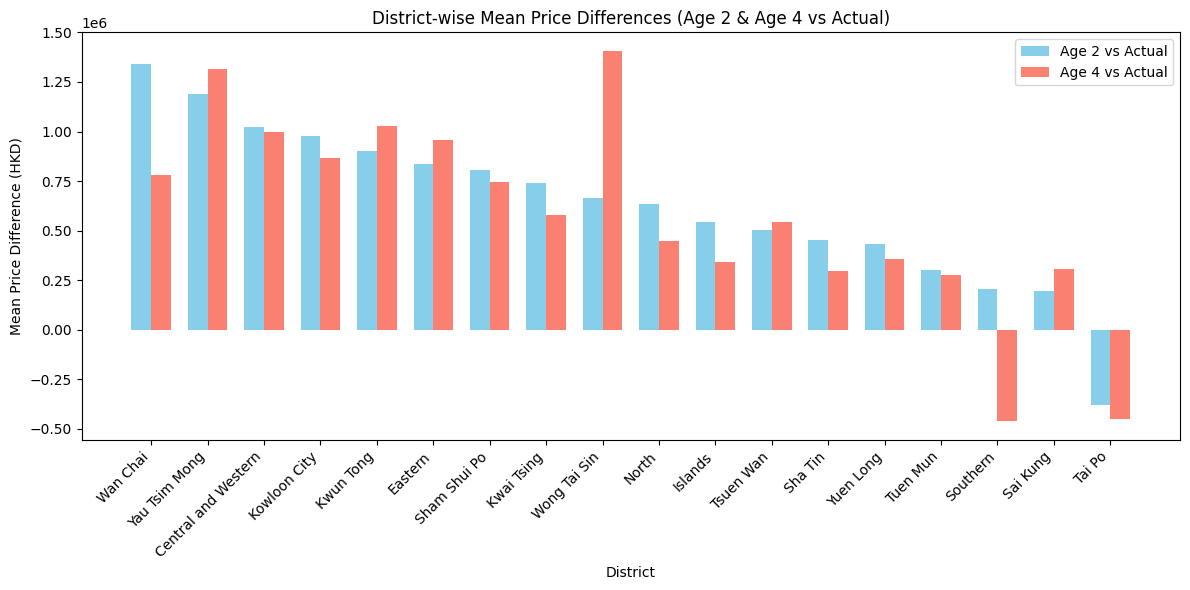

In [22]:
# Select only the required columns and sort by difference (largest first)
result = district_stats[['district_key', 'age_2_vs_actual_diff', 'age_4_vs_actual_diff']]
result = result.sort_values('age_2_vs_actual_diff', ascending=False).reset_index(drop=True)

# Add rank columns based on the sorted order
result['age_2_vs_actual_rank'] = result['age_2_vs_actual_diff'].rank(ascending=False, method='min').astype(int)
result['age_4_vs_actual_rank'] = result['age_4_vs_actual_diff'].rank(ascending=False, method='min').astype(int)

print(result)
# Visualize the differences for each district as a grouped bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(result['district_key']))

plt.bar(x, result['age_2_vs_actual_diff'], width=bar_width, label='Age 2 vs Actual', color='skyblue')
plt.bar([i + bar_width for i in x], result['age_4_vs_actual_diff'], width=bar_width, label='Age 4 vs Actual', color='salmon')

plt.xlabel('District')
plt.ylabel('Mean Price Difference (HKD)')
plt.title('District-wise Mean Price Differences (Age 2 & Age 4 vs Actual)')
plt.xticks([i + bar_width/2 for i in x], result['district_key'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\TP\AppData\Local\Temp\ipykernel_15812\1017831550.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, vert=False, patch_artist=True, labels=labels,


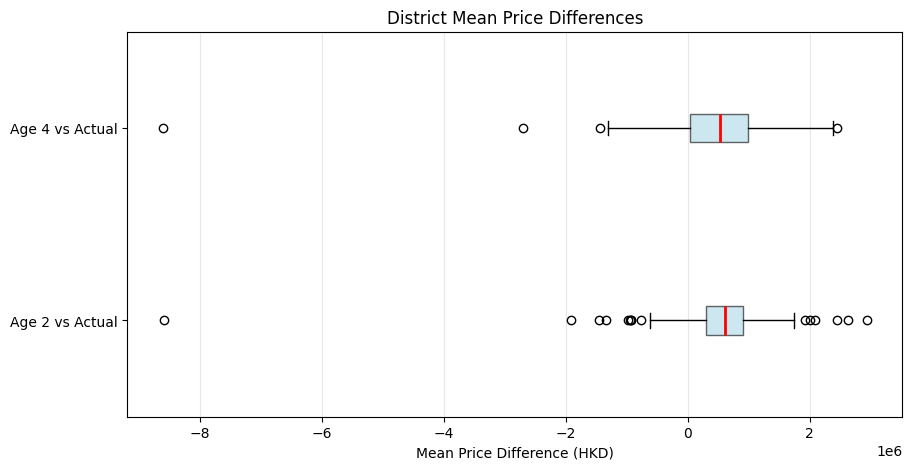

             Label    Mean  Median       Std        Min       Max      Q1  \
0  Age 2 vs Actual 525,614 616,196 1,052,399 -8,595,923 2,940,733 289,831   
1  Age 4 vs Actual 465,639 523,495 1,123,041 -8,610,439 2,443,780  27,128   

       Q3     IQR  Count  
0 908,891 619,060    144  
1 983,688 956,559    144  

Interpretation of District Mean Price Differences:
- Age 2 vs Actual: Mean difference is HKD 525,614, median is HKD 616,196.
- Age 4 vs Actual: Mean difference is HKD 465,639, median is HKD 523,495.
- Both distributions are right-skewed (max values much larger than median).
- There are districts with negative differences (min: Age 2 = -8,595,923, Age 4 = -8,610,439), indicating some districts where model worthiness is lower than actual price.
- The IQR is large (Age 2: 619,060, Age 4: 956,559), showing high variability between districts.
- Age 2 worthiness generally has a higher mean and median difference than Age 4, suggesting working class worthiness prices are further above 

In [29]:
import pandas as pd

# Group by district and compute mean price differences
district_stats_by_name = model_output_df.groupby('district').agg(
    age_2_vs_actual_diff=('age_2_worthiness_price', lambda x: x.mean() - model_output_df.loc[x.index, 'actual_price'].mean()),
    age_4_vs_actual_diff=('age_4_worthiness_price', lambda x: x.mean() - model_output_df.loc[x.index, 'actual_price'].mean())
).reset_index()

# Prepare data for boxplot
data = [district_stats_by_name['age_2_vs_actual_diff'], district_stats_by_name['age_4_vs_actual_diff']]
labels = ['Age 2 vs Actual', 'Age 4 vs Actual']

plt.figure(figsize=(10, 5))
box = plt.boxplot(data, vert=False, patch_artist=True, labels=labels,
                  boxprops=dict(facecolor='lightblue', alpha=0.6),
                  medianprops=dict(color='red', linewidth=2))

plt.xlabel('Mean Price Difference (HKD)')
plt.title('District Mean Price Differences')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Summarise statistics in a table

summary_stats = []
for d, label in zip(data, labels):
    summary_stats.append({
        'Label': label,
        'Mean': d.mean(),
        'Median': d.median(),
        'Std': d.std(),
        'Min': d.min(),
        'Max': d.max(),
        'Q1': d.quantile(0.25),
        'Q3': d.quantile(0.75),
        'IQR': d.quantile(0.75) - d.quantile(0.25),
        'Count': len(d)
    })

stats_df = pd.DataFrame(summary_stats)
print(stats_df)
# Interpretation of summary statistics
print("\nInterpretation of District Mean Price Differences:")
print("- Age 2 vs Actual: Mean difference is HKD {:,.0f}, median is HKD {:,.0f}.".format(stats_df.loc[0, 'Mean'], stats_df.loc[0, 'Median']))
print("- Age 4 vs Actual: Mean difference is HKD {:,.0f}, median is HKD {:,.0f}.".format(stats_df.loc[1, 'Mean'], stats_df.loc[1, 'Median']))
print("- Both distributions are right-skewed (max values much larger than median).")
print("- There are districts with negative differences (min: Age 2 = {:,.0f}, Age 4 = {:,.0f}), indicating some districts where model worthiness is lower than actual price.".format(stats_df.loc[0, 'Min'], stats_df.loc[1, 'Min']))
print("- The IQR is large (Age 2: {:,.0f}, Age 4: {:,.0f}), showing high variability between districts.".format(stats_df.loc[0, 'IQR'], stats_df.loc[1, 'IQR']))
print("- Age 2 worthiness generally has a higher mean and median difference than Age 4, suggesting working class worthiness prices are further above actual prices than elderly worthiness prices in most districts.")

           district_key  age_2_vs_actual_diff  age_4_vs_actual_diff  \
0              Wan Chai             1,339,008               780,385   
1         Yau Tsim Mong             1,189,319             1,316,745   
2   Central and Western             1,025,125               997,341   
3          Kowloon City               975,607               865,020   
4             Kwun Tong               902,618             1,027,184   
5               Eastern               837,475               959,295   
6          Sham Shui Po               806,188               742,886   
7            Kwai Tsing               738,415               577,364   
8          Wong Tai Sin               666,375             1,406,885   
9                 North               635,729               447,336   
10              Islands               541,856               340,522   
11            Tsuen Wan               505,709               542,797   
12              Sha Tin               453,206               297,820   
13    

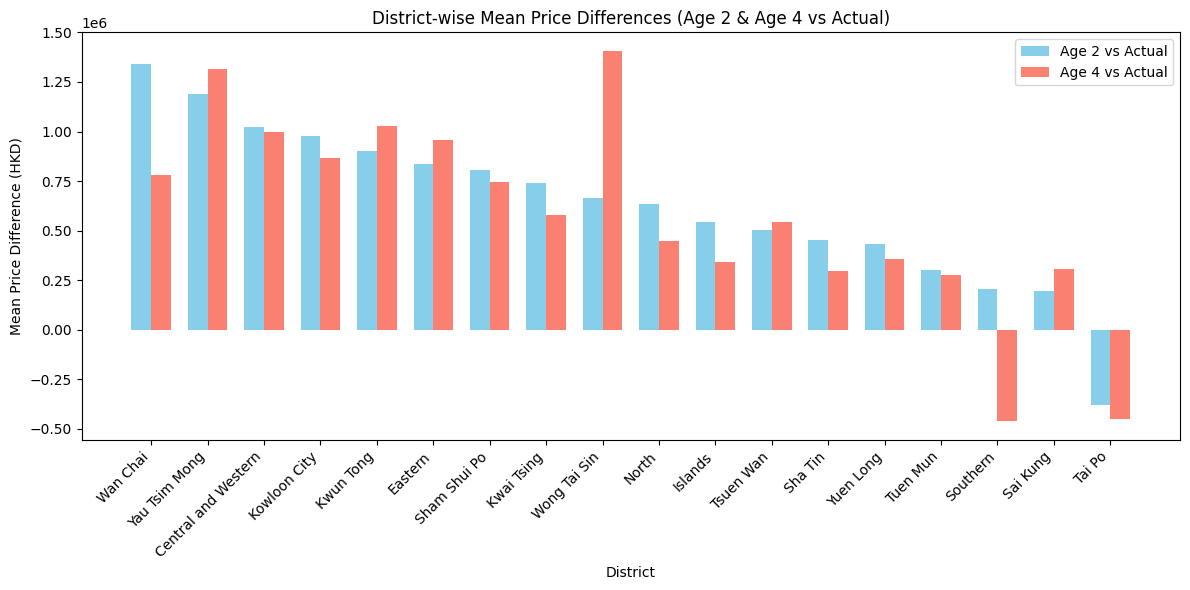

In [ ]:
# Select only the required columns and sort by difference (largest first)
result = district_stats[['district_key', 'age_2_vs_actual_diff', 'age_4_vs_actual_diff']]
result = result.sort_values('age_2_vs_actual_diff', ascending=False).reset_index(drop=True)

# Add rank columns based on the sorted order
result['age_2_vs_actual_rank'] = result['age_2_vs_actual_diff'].rank(ascending=False, method='min').astype(int)
result['age_4_vs_actual_rank'] = result['age_4_vs_actual_diff'].rank(ascending=False, method='min').astype(int)

print(result)
# Visualize the differences for each district as a grouped bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(result['district_key']))

plt.bar(x, result['age_2_vs_actual_diff'], width=bar_width, label='Age 2 vs Actual', color='skyblue')
plt.bar([i + bar_width for i in x], result['age_4_vs_actual_diff'], width=bar_width, label='Age 4 vs Actual', color='salmon')

plt.xlabel('District')
plt.ylabel('Mean Price Difference (HKD)')
plt.title('District-wise Mean Price Differences (Age 2 & Age 4 vs Actual)')
plt.xticks([i + bar_width/2 for i in x], result['district_key'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Score base rating for the age groups

In [1]:
import pandas as pd

score_rate_df = pd.read_csv('txn_df_with_custom_poi_features.csv')


# Select only the specified columns using double square brackets
score_rate_df = score_rate_df[['main_district', 'housing_market_area', 'bedroom_count',
    'class_AMD_within_1500m', 'class_AQU_within_1500m', 'class_BGD_within_1500m', 'class_BUS_within_1500m',
    'class_CMF_within_1500m', 'class_COM_within_1500m', 'class_CUF_within_1500m', 'class_GOV_within_1500m',
    'class_HNC_within_1500m', 'class_MUF_within_1500m', 'class_PAK_within_1500m', 'class_REM_within_1500m',
    'class_RSF_within_1500m', 'class_SCH_within_1500m', 'class_TRF_within_1500m', 'class_TRH_within_1500m',
    'class_TRS_within_1500m', 'class_UTI_within_1500m', 'mtr_station_within_1000m'
]]
print(score_rate_df['mtr_station_within_1000m'].head())

0    1
1    1
2    1
3    1
4    1
Name: mtr_station_within_1000m, dtype: int64


In [2]:
#apply calculation

# Define bedroom weights (example: 1-bedroom: 1.0, 2-bedroom: 1.2, 3-bedroom: 1.5, 4-bedroom: 1.8, etc.)
elderly_bedroom_weight_map = {
    1: 0.522041,
    2: 0.522041,
    3: 0.372007,
    4: 0.890750,
    5: 0.771534
}
# Working population bedroom weights
working_bedroom_weight_map = {
    1: 0.620547,
    2: 0.605019,
    3: 0.044497,
    4: 0.266851,
    5: 0.266851  # Use the same as 4 if 5-bedroom is rare or not specified
}
# Map the bedroom_count to its corresponding weight for working population and elderly
score_rate_df['working_bedroom_weight'] = score_rate_df['bedroom_count'].map(working_bedroom_weight_map)
score_rate_df['elderly_bedroom_weight'] = score_rate_df['bedroom_count'].map(elderly_bedroom_weight_map)

# Example: calculate a simple score using the weights (you can adjust the formula as needed)
score_rate_df['working_class_bd_working_score'] = score_rate_df['working_bedroom_weight'] * 100
score_rate_df['elderly_class_bd_elderly_score'] = score_rate_df['elderly_bedroom_weight'] * 100


# Only copy the columns 'bd_working_score' and 'bd_elderly_score' to the final_score_df
final_score_df = score_rate_df[['main_district','housing_market_area', 'working_class_bd_working_score', 'elderly_class_bd_elderly_score']].copy()



In [3]:
# Define POI class weights for working and elderly populations (example values, adjust as needed)

working_poi_weight_map = {
    'class_HNC_within_1500m': 0.10152,
    'class_BGD_within_1500m': 0.0,
    'class_SCH_within_1500m': 0.300066,
    'class_CMF_within_1500m': 0.547945,
    'class_BUS_within_1500m': 0.408118,
    'class_GOV_within_1500m': 0.797356,
    'class_AMD_within_1500m': 0.729965,
    'class_TRS_within_1500m': 0.660687,
    'class_RSF_within_1500m': 0.598506,
    'class_AQU_within_1500m': 0.520584,
    'class_TRH_within_1500m': 0.80994,
    'class_REM_within_1500m': 0.796439,
    'class_UTI_within_1500m': 0.724236,
    'class_COM_within_1500m': 0.808766,
    'class_TRF_within_1500m': 0.795274,
    'class_MUF_within_1500m': 0.890925,
    'class_CUF_within_1500m': 1.0,
    'class_PAK_within_1500m': 0.959917,
}

elderly_poi_weight_map = {
    'class_HNC_within_1500m': 1.0,
    'class_BGD_within_1500m': 0.909788,
    'class_SCH_within_1500m': 0.665867,
    'class_CMF_within_1500m': 0.641444,
    'class_BUS_within_1500m': 0.567577,
    'class_GOV_within_1500m': 0.537959,
    'class_AMD_within_1500m': 0.427899,
    'class_TRS_within_1500m': 0.344621,
    'class_RSF_within_1500m': 0.327821,
    'class_AQU_within_1500m': 0.265694,
    'class_TRH_within_1500m': 0.215829,
    'class_REM_within_1500m': 0.188085,
    'class_UTI_within_1500m': 0.179375,
    'class_COM_within_1500m': 0.157249,
    'class_TRF_within_1500m': 0.150536,
    'class_MUF_within_1500m': 0.029093,
    'class_CUF_within_1500m': 0.022997,
    'class_PAK_within_1500m': 0.0,
}

# Normalize POI counts by dividing by the max of each column, then multiply by weight and 100
for poi_class in working_poi_weight_map.keys():
    max_val = score_rate_df[poi_class].max()
    if max_val == 0:
        # Avoid division by zero; set score to zero if column is all zeros
        score_rate_df[f'working_{poi_class}_score'] = 0
        score_rate_df[f'elderly_{poi_class}_score'] = 0
    else:
        score_rate_df[f'working_{poi_class}_score'] = (
            score_rate_df[poi_class] / max_val * working_poi_weight_map[poi_class] * 100
        )
        score_rate_df[f'elderly_{poi_class}_score'] = (
            score_rate_df[poi_class] / max_val * elderly_poi_weight_map[poi_class] * 100
        )
# Calculate POI scores for working and elderly populations
for poi_class in working_poi_weight_map.keys():
    score_rate_df[f'working_{poi_class}_score'] = score_rate_df[poi_class] * working_poi_weight_map[poi_class]
    score_rate_df[f'elderly_{poi_class}_score'] = score_rate_df[poi_class] * elderly_poi_weight_map[poi_class]

    # Collect all POI score columns for working and elderly
    poi_score_cols = []
    for poi_class in working_poi_weight_map.keys():
        poi_score_cols.append(f'working_{poi_class}_score')
        poi_score_cols.append(f'elderly_{poi_class}_score')

    # Copy POI scores into final_score_df, aligning by index
    final_score_df = pd.concat([final_score_df, score_rate_df[poi_score_cols]], axis=1)

final_score_df.head()

,main_district,housing_market_area,working_class_bd_working_score,elderly_class_bd_elderly_score,working_class_HNC_within_1500m_score,elderly_class_HNC_within_1500m_score,working_class_BGD_within_1500m_score,elderly_class_BGD_within_1500m_score,working_class_SCH_within_1500m_score,elderly_class_SCH_within_1500m_score,...,working_class_COM_within_1500m_score,elderly_class_COM_within_1500m_score,working_class_TRF_within_1500m_score,elderly_class_TRF_within_1500m_score,working_class_MUF_within_1500m_score,elderly_class_MUF_within_1500m_score,working_class_CUF_within_1500m_score,elderly_class_CUF_within_1500m_score,working_class_PAK_within_1500m_score,elderly_class_PAK_within_1500m_score
0,Sham Shui Po,Olympic Station,26.6851,89.0750,10.45656,103.0,0.0,2.756933,14.962195,33.202135,...,12.131490,2.358735,10.338562,1.956968,91.765275,2.996579,25.0,0.574925,0.0,0.0
1,Tuen Mun,Siu Hong,60.5019,52.2041,3.55320,35.0,0.0,27.569333,5.919110,13.134911,...,20.219150,3.931225,7.157466,1.354824,73.055850,2.385626,15.0,0.344955,0.0,0.0
2,Tuen Mun,Lam Tei,60.5019,52.2041,0.91368,9.0,0.0,0.000000,1.808617,4.013445,...,11.322724,2.201486,7.157466,1.354824,56.128275,1.832859,9.0,0.206973,0.0,0.0
3,Yau Tsim Mong,Kowloon Station,4.4497,37.2007,3.24864,32.0,0.0,0.000000,5.179221,11.493047,...,6.470128,1.257992,11.133836,2.107504,39.200700,1.280092,41.0,0.942877,0.0,0.0
4,Sham Shui Po,Cheung Sha Wan,60.5019,52.2041,9.03528,89.0,0.0,5.513867,16.359763,36.303434,...,21.836682,4.245723,11.929110,2.258040,102.456375,3.345695,30.0,0.689910,0.0,0.0


MTR 

In [4]:
elderly_mtr_weight_map = {
    1: 0.90,
    0: 0,
}
working_mtr_weight_map = {
    1: 0.375,
    2: 0
}

# Calculate MTR score for elderly
score_rate_df['elderly_mtr_score'] = score_rate_df['mtr_station_within_1000m'].map(elderly_mtr_weight_map) * 100
# Calculate MTR score for working population
score_rate_df['working_mtr_score'] = score_rate_df['mtr_station_within_1000m'].map(working_mtr_weight_map) * 100

# Add to final_score_df
final_score_df['elderly_mtr_score'] = score_rate_df['elderly_mtr_score']
final_score_df['working_mtr_score'] = score_rate_df['working_mtr_score']

final_score_df[['elderly_mtr_score', 'working_mtr_score']].head()


,elderly_mtr_score,working_mtr_score
0,90.0,37.5
1,90.0,37.5
2,90.0,37.5
3,90.0,37.5
4,90.0,37.5


Districts

In [5]:
elderly_scores = {
    "Central and Western": 0,
    "Wan Chai": 0.256,
    "Islands": 0.379,
    "Yau Tsim Mong": 0.398,
    "Southern": 0.414,
    "Eastern": 0.474,
    "Sha Tin": 0.604,
    "Kwun Tong": 0.606,
    "Tuen Mun": 0.606,
    "Tai Po": 0.614,
    "North": 0.616,
    "Yuen Long": 0.639,
    "Kowloon City": 0.665,
    "Kwai Tsing": 0.697,
    "Tsuen Wan": 0.714,
    "Sham Shui Po": 0.781,
    "Sai Kung": 0.799,
    "Wong Tai Sin": 1
}

working_class_scores = {
    "Central and Western": 1,
    "Wan Chai": 0.744,
    "Islands": 0.621,
    "Yau Tsim Mong": 0.602,
    "Southern": 0.586,
    "Eastern": 0.526,
    "Sha Tin": 0.396,
    "Kwun Tong": 0.394,
    "Tuen Mun": 0.394,
    "Tai Po": 0.386,
    "North": 0.384,
    "Yuen Long": 0.361,
    "Kowloon City": 0.335,
    "Kwai Tsing": 0.303,
    "Tsuen Wan": 0.286,
    "Sham Shui Po": 0.219,
    "Sai Kung": 0.201,
    "Wong Tai Sin": 0
}

# Calculate MTR score for elderly
score_rate_df['elderly_district_score'] = score_rate_df['main_district'].map(elderly_scores) * 100
# Calculate MTR score for working population
score_rate_df['working_district_score'] = score_rate_df['main_district'].map(working_class_scores) * 100

# Add to final_score_df
final_score_df['elderly_district_score'] = score_rate_df['elderly_district_score']
final_score_df['working_district_score'] = score_rate_df['working_district_score']

final_score_df[['elderly_district_score', 'working_district_score']].head()

,elderly_district_score,working_district_score
0,78.1,21.9
1,60.6,39.4
2,60.6,39.4
3,39.8,60.2
4,78.1,21.9


In [6]:

final_score_df.columns.tolist()

['main_district',
 'housing_market_area',
 'working_class_bd_working_score',
 'elderly_class_bd_elderly_score',
 'working_class_HNC_within_1500m_score',
 'elderly_class_HNC_within_1500m_score',
 'working_class_BGD_within_1500m_score',
 'elderly_class_BGD_within_1500m_score',
 'working_class_SCH_within_1500m_score',
 'elderly_class_SCH_within_1500m_score',
 'working_class_CMF_within_1500m_score',
 'elderly_class_CMF_within_1500m_score',
 'working_class_BUS_within_1500m_score',
 'elderly_class_BUS_within_1500m_score',
 'working_class_GOV_within_1500m_score',
 'elderly_class_GOV_within_1500m_score',
 'working_class_AMD_within_1500m_score',
 'elderly_class_AMD_within_1500m_score',
 'working_class_TRS_within_1500m_score',
 'elderly_class_TRS_within_1500m_score',
 'working_class_RSF_within_1500m_score',
 'elderly_class_RSF_within_1500m_score',
 'working_class_AQU_within_1500m_score',
 'elderly_class_AQU_within_1500m_score',
 'working_class_TRH_within_1500m_score',
 'elderly_class_TRH_within_

In [ ]:
final_score_df.head()


# Calculate total POI score for working and elderly (sum all POI score columns)
poi_score_cols_working = [col for col in final_score_df.columns if col.startswith('working') and col.endswith('1500m_score')]
poi_score_cols_elderly = [col for col in final_score_df.columns if col.startswith('elderly') and col.endswith('1500m_score')]

final_score_df['total_working_poi_score'] = final_score_df[poi_score_cols_working].sum(axis=1)
final_score_df['total_elderly_poi_score'] = final_score_df[poi_score_cols_elderly].sum(axis=1)

# Normalize each component to 0-1 range using the global max across both groups for each component
poi_max = max(final_score_df['total_working_poi_score'].max(), final_score_df['total_elderly_poi_score'].max())
mtr_max = max(final_score_df['working_mtr_score'].max(), final_score_df['elderly_mtr_score'].max())
room_max = max(final_score_df['working_class_bd_working_score'].max(), final_score_df['elderly_class_bd_elderly_score'].max())
district_max = max(final_score_df['working_district_score'].max(), final_score_df['elderly_district_score'].max())

final_score_df['norm_working_poi'] = final_score_df['total_working_poi_score'] / poi_max
final_score_df['norm_elderly_poi'] = final_score_df['total_elderly_poi_score'] / poi_max
final_score_df['norm_working_mtr'] = final_score_df['working_mtr_score'] / mtr_max
final_score_df['norm_elderly_mtr'] = final_score_df['elderly_mtr_score'] / mtr_max
final_score_df['norm_working_room'] = final_score_df['working_class_bd_working_score'] / room_max
final_score_df['norm_elderly_room'] = final_score_df['elderly_class_bd_elderly_score'] / room_max
final_score_df['norm_working_district'] = final_score_df['working_district_score'] / district_max
final_score_df['norm_elderly_district'] = final_score_df['elderly_district_score'] / district_max


# Weighted sum for overall score (out of 100)
final_score_df['working_total_score'] = (
    final_score_df['norm_working_poi'] * 20 +
    final_score_df['norm_working_mtr'] * 20 +
    final_score_df['norm_working_room'] * 10 +
    final_score_df['norm_working_district'] * 50
)

final_score_df['elderly_total_score'] = (
    final_score_df['norm_elderly_poi'] * 20 +
    final_score_df['norm_elderly_mtr'] * 20 +
    final_score_df['norm_elderly_room'] * 10 +
    final_score_df['norm_elderly_district'] * 40
)

# Show the new columns
final_score_df[['working_total_score', 'elderly_total_score']].head()


,working_total_score,elderly_total_score
0,53.680236,75.841449
1,38.050778,49.424575
2,32.388825,44.505265
3,43.476697,57.331578
4,51.654960,60.471548


In [7]:
final_score_df.head()


# Calculate total POI score for working and elderly (sum all POI score columns)
poi_score_cols_working = [col for col in final_score_df.columns if col.startswith('working') and col.endswith('1500m_score')]
poi_score_cols_elderly = [col for col in final_score_df.columns if col.startswith('elderly') and col.endswith('1500m_score')]

final_score_df['total_working_poi_score'] = final_score_df[poi_score_cols_working].sum(axis=1)
final_score_df['total_elderly_poi_score'] = final_score_df[poi_score_cols_elderly].sum(axis=1)

# Normalize each component to 0-1 range using the global max across both groups for each component
poi_max = max(final_score_df['total_working_poi_score'].max(), final_score_df['total_elderly_poi_score'].max())
mtr_max = max(final_score_df['working_mtr_score'].max(), final_score_df['elderly_mtr_score'].max())
room_max = max(final_score_df['working_class_bd_working_score'].max(), final_score_df['elderly_class_bd_elderly_score'].max())
district_max = max(final_score_df['working_district_score'].max(), final_score_df['elderly_district_score'].max())

final_score_df['norm_working_poi'] = final_score_df['total_working_poi_score'] / poi_max
final_score_df['norm_elderly_poi'] = final_score_df['total_elderly_poi_score'] / poi_max
final_score_df['norm_working_mtr'] = final_score_df['working_mtr_score'] / mtr_max
final_score_df['norm_elderly_mtr'] = final_score_df['elderly_mtr_score'] / mtr_max
final_score_df['norm_working_room'] = final_score_df['working_class_bd_working_score'] / room_max
final_score_df['norm_elderly_room'] = final_score_df['elderly_class_bd_elderly_score'] / room_max
final_score_df['norm_working_district'] = final_score_df['working_district_score'] / district_max
final_score_df['norm_elderly_district'] = final_score_df['elderly_district_score'] / district_max


# Weighted sum for overall score (out of 100)
final_score_df['working_total_score'] = (
    final_score_df['norm_working_poi'] * 20 +
    final_score_df['norm_working_mtr'] * 20 +
    final_score_df['norm_working_room'] * 10 +
    final_score_df['norm_working_district'] * 50
)

final_score_df['elderly_total_score'] = (
    final_score_df['norm_elderly_poi'] * 20 +
    final_score_df['norm_elderly_mtr'] * 20 +
    final_score_df['norm_elderly_room'] * 10 +
    final_score_df['norm_elderly_district'] * 40
)

# Show the new columns
final_score_df[['working_total_score', 'elderly_total_score']].head()


,working_total_score,elderly_total_score
0,36.354588,71.576580
1,39.612093,53.181968
2,37.347312,51.214244
3,50.923921,47.687898
4,36.303766,64.600757


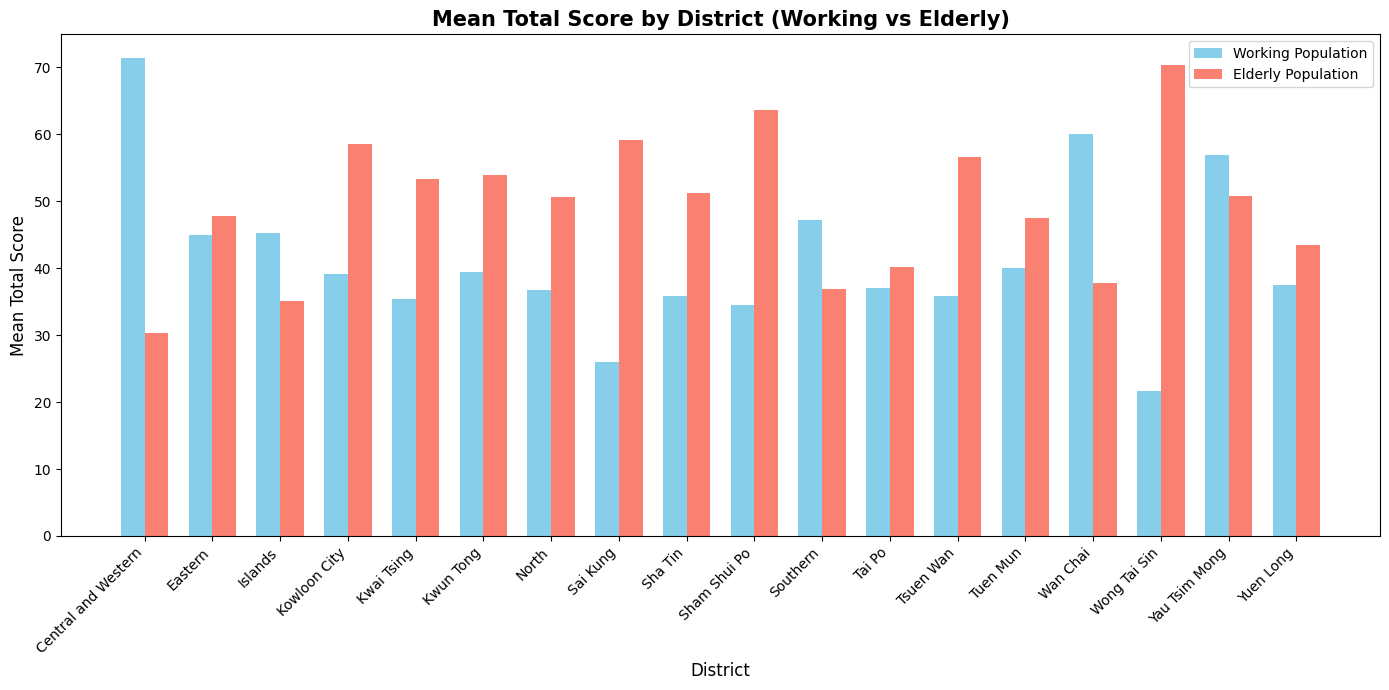

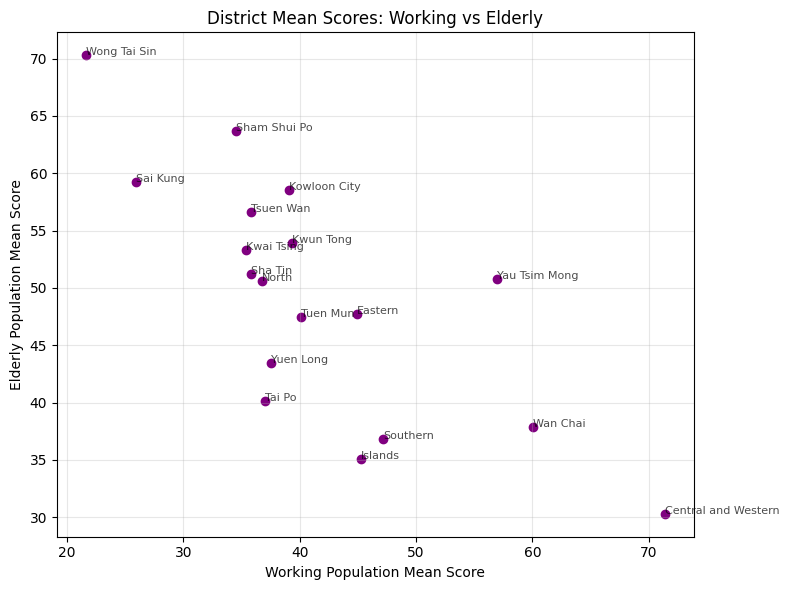

In [8]:
# Group by main_district only and show the mean scores
final_scores_summary = final_score_df.groupby('main_district')[
    ['working_total_score', 'elderly_total_score']
].mean().reset_index()

final_scores_summary.head()

import matplotlib.pyplot as plt

# Bar plot for mean scores by district
fig, ax = plt.subplots(figsize=(14, 7))
bar_width = 0.35
x = range(len(final_scores_summary['main_district']))

ax.bar(x, final_scores_summary['working_total_score'], width=bar_width, label='Working Population', color='skyblue')
ax.bar([i + bar_width for i in x], final_scores_summary['elderly_total_score'], width=bar_width, label='Elderly Population', color='salmon')

ax.set_xlabel('District', fontsize=12)
ax.set_ylabel('Mean Total Score', fontsize=12)
ax.set_title('Mean Total Score by District (Working vs Elderly)', fontsize=15, fontweight='bold')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(final_scores_summary['main_district'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# Scatter plot to compare working vs elderly scores by district
plt.figure(figsize=(8, 6))
plt.scatter(final_scores_summary['working_total_score'], final_scores_summary['elderly_total_score'], color='purple')
for i, row in final_scores_summary.iterrows():
    plt.text(row['working_total_score'], row['elderly_total_score'], row['main_district'], fontsize=8, alpha=0.7)
plt.xlabel('Working Population Mean Score')
plt.ylabel('Elderly Population Mean Score')
plt.title('District Mean Scores: Working vs Elderly')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
final_score_df.columns.tolist()
final_score_df.to_csv('final_score_df_v1.csv', index=False)
# 
